In [2]:
# # Python ≥3.5 is required
# import sys
# assert sys.version_info >= (3, 5)

# # Scikit-Learn ≥0.20 is required
# import sklearn
# assert sklearn.__version__ >= "0.20"

# try:
#     # %tensorflow_version only exists in Colab.
#     %tensorflow_version 2.x
# except Exception:
#     pass

# # TensorFlow ≥2.0 is required
# import tensorflow as tf
# assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
print("TensorFlow Version: {}".format(tf.__version__), end='\n'"Keras Version:  {}".format(keras.__version__))

TensorFlow Version: 2.3.0
Keras Version:  2.4.0

Using Keras to Load the Dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

Let's take a look at a few sample of the images in the Fashion MNIST dataset:

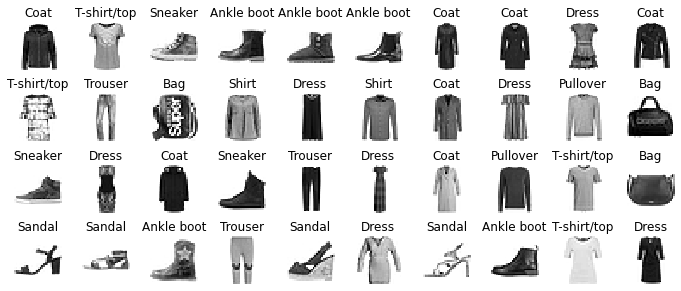

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# **Creating the Model Using the Sequential API**
Now let’s build the neural network! Here is a classification MLP with two hidden layers:

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instead of adding the layers one by one as we just did, you can pass a list of layers
when creating the Sequential model:

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
model.layers[1].name

'dense_3'

In [17]:
model.get_layer('dense_3').name

'dense_3'

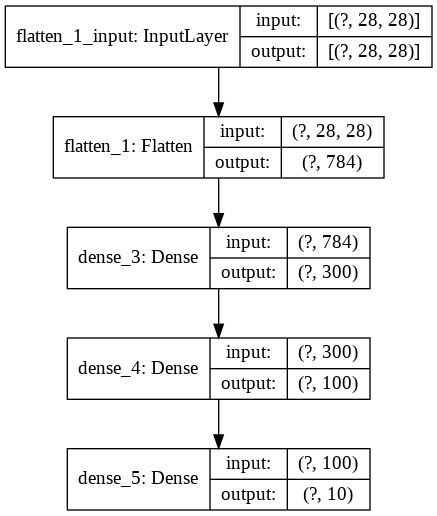

In [18]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [20]:
model.get_layer(hidden1.name) is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[ 0.06808659,  0.04520075, -0.05722191, ...,  0.05538046,
         0.03497204,  0.01773745],
       [-0.05695155,  0.07366203,  0.01997493, ...,  0.0600166 ,
        -0.05514305, -0.02983351],
       [ 0.02392098,  0.07299146, -0.06372372, ..., -0.05353341,
        -0.01390976, -0.04159983],
       ...,
       [-0.03756049,  0.02320587, -0.0738119 , ...,  0.00950366,
         0.02087919,  0.00592733],
       [ 0.04615352,  0.04134376,  0.00678897, ...,  0.05624183,
         0.02271756,  0.02017601],
       [-0.00293332, -0.03814102, -0.00321672, ...,  0.001851  ,
         0.07349205, -0.05699775]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

Compiling the Model

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [27]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

Training and Evaluating the Model

In [28]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7053 - sparse_categorical_accuracy: 0.7726 - val_loss: 0.5019 - val_sparse_categorical_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4871 - sparse_categorical_accuracy: 0.8297 - val_loss: 0.4512 - val_sparse_categorical_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4444 - sparse_categorical_accuracy: 0.8434 - val_loss: 0.4166 - val_sparse_categorical_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4186 - sparse_categorical_accuracy: 0.8533 - val_loss: 0.4217 - val_sparse_categorical_accuracy: 0.8502
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3990 - sparse_categorical_accuracy: 0.8590 - val_loss: 0.3869 - val_sparse_categorical_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3830 - spars

In [29]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [30]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [31]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

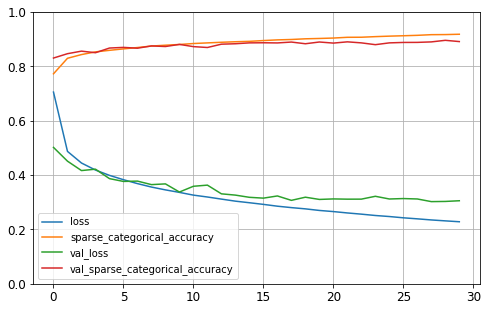

In [32]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3413 - sparse_categorical_accuracy: 0.8818


[0.3412538170814514, 0.8817999958992004]

Using the Model to Make Predictions

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

And the classifier actually classified all three images correctly:

In [37]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

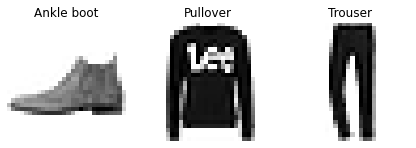

In [38]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Saving and Restoring a Model

In [39]:
model.save("my_keras_model.h5")

In [40]:
model = keras.models.load_model("my_keras_model.h5")

In [41]:
model.predict(X_new)

array([[3.43684042e-06, 4.36878963e-07, 7.03421301e-06, 3.96290602e-07,
        3.70023213e-06, 4.34176950e-03, 3.27696421e-06, 1.02050565e-02,
        1.38854288e-04, 9.85296071e-01],
       [5.83206536e-04, 3.40372139e-08, 9.89576578e-01, 5.33323474e-09,
        9.32212546e-03, 1.20019125e-11, 5.17747947e-04, 1.03002340e-12,
        3.32464140e-07, 4.35615866e-12],
       [3.27866292e-05, 9.99956250e-01, 3.87056389e-06, 1.43500165e-06,
        5.69837948e-06, 6.14776979e-12, 1.09979792e-09, 5.80572035e-09,
        1.11966847e-09, 9.82196324e-10]], dtype=float32)

In [42]:
model.save_weights("my_keras_weights.ckpt")

In [43]:
model.load_weights("my_keras_weights.ckpt")

Using Callbacks

In [44]:
## After Build and Compile the Model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2237 - sparse_categorical_accuracy: 0.9201
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2210 - sparse_categorical_accuracy: 0.9195
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2170 - sparse_categorical_accuracy: 0.9226
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2133 - sparse_categorical_accuracy: 0.9236
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2104 - sparse_categorical_accuracy: 0.9246
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2060 - sparse_categorical_accuracy: 0.9258
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2031 - sparse_categorical_accuracy: 0.9273
Epoch 8/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2002 - sparse_categorical_accuracy: 0.9273
Epoch 9/10
1719/1719 [==========

In [45]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", 
                                                save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1912 - sparse_categorical_accuracy: 0.9313 - val_loss: 0.2994 - val_sparse_categorical_accuracy: 0.8930
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1885 - sparse_categorical_accuracy: 0.9331 - val_loss: 0.2967 - val_sparse_categorical_accuracy: 0.8976
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1862 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.3191 - val_sparse_categorical_accuracy: 0.8900
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1822 - sparse_categorical_accuracy: 0.9351 - val_loss: 0.2922 - val_sparse_categorical_accuracy: 0.8938
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1802 - sparse_categorical_accuracy: 0.9356 - val_loss: 0.3009 - val_sparse_categorical_accuracy: 0.8916
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1766 - spars

In [46]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1661 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.3127 - val_sparse_categorical_accuracy: 0.8958
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1623 - sparse_categorical_accuracy: 0.9419 - val_loss: 0.2923 - val_sparse_categorical_accuracy: 0.8954
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1610 - sparse_categorical_accuracy: 0.9427 - val_loss: 0.2942 - val_sparse_categorical_accuracy: 0.8982
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1585 - sparse_categorical_accuracy: 0.9437 - val_loss: 0.3010 - val_sparse_categorical_accuracy: 0.8942
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1557 - sparse_categorical_accuracy: 0.9443 - val_loss: 0.3038 - val_sparse_categorical_accuracy: 0.8966
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1531 -

In [47]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [48]:
val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

1706/1719 [============================>.] - ETA: 0s - loss: 0.1478 - sparse_categorical_accuracy: 0.9475
val/train: 2.11
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1479 - sparse_categorical_accuracy: 0.9476 - val_loss: 0.3122 - val_sparse_categorical_accuracy: 0.8928
